In [2]:
import os
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [3]:
print('Inicializado Rotina json_collect.py.')
os.chdir(sys.path[0])
# os.chdir(os.path.join(os.getcwd(),"json_collect.py"))                  # Modifica o diretório de trabalho, para os caminhos relativos funcionar. (https://stackoverflow.com/questions/1432924/python-change-the-scripts-working-directory-to-the-scripts-own-directory)
# print(os.getcwd())
%run ./json_collect.py                      


Inicializado Rotina json_collect.py.


In [4]:
# sites: https://dadosabertos.bcb.gov.br/dataset/expectativas-mercado
# Sintase: https://dadosabertos.bcb.gov.br/dataset/expectativas-mercado/resource/d420a704-75a7-4f45-8f4b-0fca813c70f0
# documentação: https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/documentacao

In [5]:
df_selic_data=pd.read_csv('./input/selic_datas.csv',index_col='Reuniao')
df_selic=pd.read_csv('./output/selic_data_df.csv',index_col='Reuniao')
df_selic=df_selic.drop(columns=['Unnamed: 0','Indicador'])
df_selic['Data']=df_selic.apply(lambda x: datetime.datetime.strptime(x.Data,'%Y-%m-%d').date(),axis=1)

df_selic['data_reuniao']=''
for i in range(0, len(df_selic)):
    busca_data=''
    try:
        busca_data=df_selic_data.loc[df_selic.index[i],'data_reuniao']
        busca_data=datetime.datetime.strptime(busca_data,'%Y-%m-%d').date()
        df_selic.loc[df_selic.index[i],'data_reuniao']=busca_data

    except:
        # será definida um expectativa para a data.
        # busca_data=df_selic_data.loc[df_selic.index[i],'data_reuniao']
        # df_selic.loc[df_selic.index[i],'data_reuniao']=busca_data
        continue

# df_selic['data_reuniao']=df_selic.apply(lambda x: datetime.datetime.strptime(x.data_reuniao,'%Y-%m-%d').date(),axis=1)
# df_selic=df_selic[df_selic['data_reuniao']!='']
df_selic=df_selic.sort_values(by=['Data','data_reuniao','baseCalculo'],ascending=[False,True,False])
df_selic=df_selic[df_selic['baseCalculo']==1]           # não sei qual é a diferença da base de cálculo.
df_selic.head(20)

,Data,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo,data_reuniao
Reuniao,,,,,,,,,
R5/2022,2022-07-29,13.7355,13.750,0.0698,13.25,13.75,86,1,2022-08-03
R6/2022,2022-07-29,13.9012,14.000,0.1800,13.50,14.25,86,1,2022-09-21
R7/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-10-26
R8/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-12-07
R1/2023,2022-07-29,13.8839,13.875,0.2846,12.75,14.75,84,1,2023-02-01
R2/2023,2022-07-29,13.8214,13.750,0.4129,11.75,14.75,84,1,2023-03-22
R3/2023,2022-07-29,13.6637,13.750,0.5982,11.00,14.75,84,1,2023-05-03
R4/2023,2022-07-29,13.3155,13.500,0.7726,10.50,14.75,84,1,2023-06-21
R5/2023,2022-07-29,12.7976,13.000,0.8569,10.50,14.50,84,1,2023-08-02


In [6]:
# Expectativa mais atual

df_selic_ultima=df_selic[df_selic['Data']==df_selic['Data'].max()]
df_selic_ultima.to_csv('./output/selic_ultima_expectativa.csv')
df_selic_ultima

,Data,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo,data_reuniao
Reuniao,,,,,,,,,
R5/2022,2022-07-29,13.7355,13.750,0.0698,13.25,13.75,86,1,2022-08-03
R6/2022,2022-07-29,13.9012,14.000,0.1800,13.50,14.25,86,1,2022-09-21
R7/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-10-26
R8/2022,2022-07-29,13.9302,14.000,0.2178,13.50,14.75,86,1,2022-12-07
R1/2023,2022-07-29,13.8839,13.875,0.2846,12.75,14.75,84,1,2023-02-01
R2/2023,2022-07-29,13.8214,13.750,0.4129,11.75,14.75,84,1,2023-03-22
R3/2023,2022-07-29,13.6637,13.750,0.5982,11.00,14.75,84,1,2023-05-03
R4/2023,2022-07-29,13.3155,13.500,0.7726,10.50,14.75,84,1,2023-06-21
R5/2023,2022-07-29,12.7976,13.000,0.8569,10.50,14.50,84,1,2023-08-02


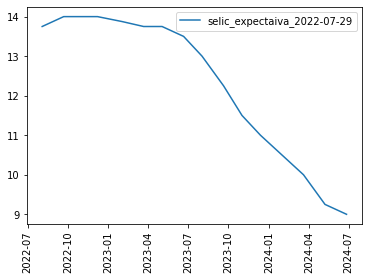

In [7]:
import matplotlib.pyplot as plt
plt.plot(df_selic_ultima['data_reuniao'], df_selic_ultima['Mediana'], label=f'selic_expectaiva_{df_selic_ultima["Data"].max()}')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [8]:
df_monthly=pd.read_csv('./output/monthly_data_df.csv')
df_monthly=df_monthly.drop(columns=['Unnamed: 0'])

# Parses
df_monthly['Data']=df_monthly.apply(lambda x: datetime.datetime.strptime(x.Data,'%Y-%m-%d').date(),axis=1)

df_monthly['DataReferencia']=df_monthly.apply(lambda x: datetime.datetime.strptime(x.DataReferencia,'%m/%Y').date(),axis=1)
delta = relativedelta(months=1)
delta_d = timedelta(days=1)
df_monthly['DataReferencia']=df_monthly.apply(lambda x: x.DataReferencia+delta-delta_d,axis=1)

df_monthly=df_monthly.sort_values(by=['Data','DataReferencia','numeroRespondentes'],ascending=[False,True,False])
# df_monthly=df_selic[df_selic['baseCalculo']==1]           # não sei qual é a diferença da base de cálculo.
df_monthly.head(20)

,Indicador,Data,DataReferencia,Media,Mediana,Minimo,Maximo,numeroRespondentes
407,IPCA,2022-07-29,2022-07-31,-0.6057,-0.650,-1.0600,0.6200,137
406,IPCA,2022-07-29,2022-07-31,-0.6265,-0.650,-1.0600,0.0000,106
419,IPCA Administrados,2022-07-29,2022-07-31,-4.1017,-4.260,-4.8700,-1.0000,77
411,IPCA Livres,2022-07-29,2022-07-31,0.6045,0.680,-0.0250,0.8000,71
417,IPCA Alimentação no domicílio,2022-07-29,2022-07-31,1.2604,1.350,-0.1600,2.0500,67
413,IPCA Serviços,2022-07-29,2022-07-31,0.6318,0.730,-0.3590,0.9100,66
415,IPCA Bens industrializados,2022-07-29,2022-07-31,0.2345,0.200,-0.4200,1.4730,65
418,IPCA Administrados,2022-07-29,2022-07-31,-4.2251,-4.280,-4.8700,-1.9100,59
410,IPCA Livres,2022-07-29,2022-07-31,0.6396,0.690,0.0000,0.8000,55
409,Taxa de desocupação,2022-07-29,2022-07-31,9.3037,9.200,8.6000,11.0000,51


In [12]:
# Expectativa mais atual para IPCA
df_ipca=df_monthly[df_monthly['Indicador']=='IPCA']

data_previsao=df_ipca['Data'].max()
df_ipca_ultima=df_ipca[df_ipca['Data']==data_previsao]
df_ipca_ultima.to_csv('./output/ipca_ultima_expectativa.csv')
df_ipca_ultima=df_ipca_ultima.groupby(['DataReferencia']).mean() # adotado média 

df_ipca_ultima['cumsum_mediana'] = df_ipca_ultima['Mediana'].cumsum()
#cumsum()-> soma acumulada de uma lista ou array termo a termo
#groupby -> delimita em grupos separados para análise
# df['Adjusted Quantity'] = df.groupby('ação_ref')['Adjusted Quantity'].cumsum()

df_ipca_ultima

,Media,Mediana,Minimo,Maximo,numeroRespondentes,cumsum_mediana
DataReferencia,,,,,,
2022-07-31,-0.61610,-0.65000,-1.0600,0.31000,121.5,-0.65000
2022-08-31,-0.12045,-0.13250,-0.8398,0.45000,121.0,-0.78250
2022-09-30,0.49635,0.50000,0.2050,0.76000,121.0,-0.28250
2022-10-31,0.55230,0.55000,0.1902,0.87315,119.0,0.26750
2022-11-30,0.54105,0.54235,0.1300,0.85000,119.0,0.80985
2022-12-31,0.75875,0.76000,0.3650,1.17000,119.0,1.56985
2023-01-31,0.79305,0.72960,0.2400,1.51000,114.5,2.29945
2023-02-28,0.66450,0.66500,0.2250,1.17000,114.5,2.96445
2023-03-31,0.47405,0.46750,0.0200,0.91000,114.5,3.43195


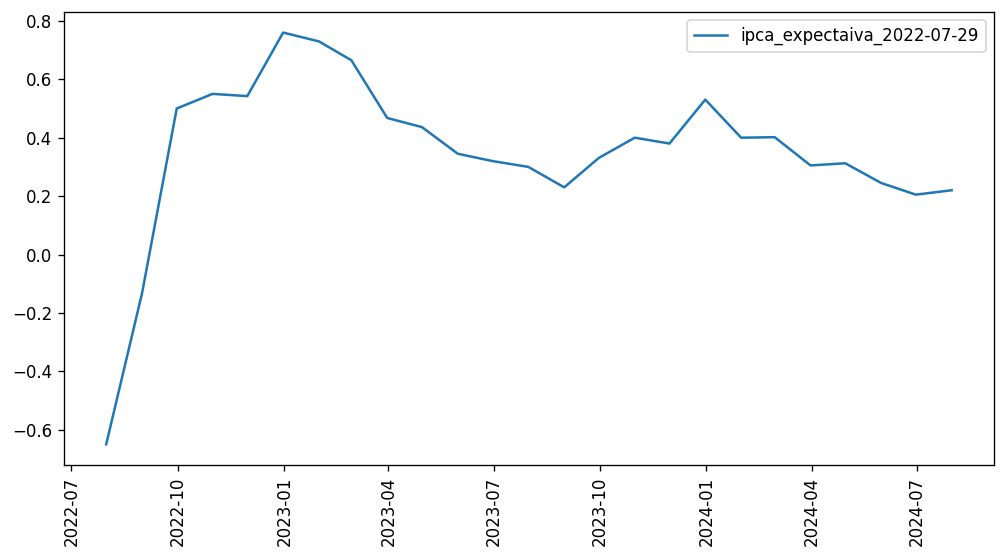

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=120)
plt.plot(df_ipca_ultima.index, df_ipca_ultima['Mediana'], label=f'ipca_expectaiva_{data_previsao}')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [27]:
data_hoje=datetime.datetime.today().date()
df_ipca_forcast=df_ipca_ultima[df_ipca_ultima.index>=data_hoje]
df_ipca_forcast

,Media,Mediana,Minimo,Maximo,numeroRespondentes,cumsum_mediana
DataReferencia,,,,,,
2022-08-31,-0.12045,-0.13250,-0.8398,0.45000,121.0,-0.78250
2022-09-30,0.49635,0.50000,0.2050,0.76000,121.0,-0.28250
2022-10-31,0.55230,0.55000,0.1902,0.87315,119.0,0.26750
2022-11-30,0.54105,0.54235,0.1300,0.85000,119.0,0.80985
2022-12-31,0.75875,0.76000,0.3650,1.17000,119.0,1.56985
2023-01-31,0.79305,0.72960,0.2400,1.51000,114.5,2.29945
2023-02-28,0.66450,0.66500,0.2250,1.17000,114.5,2.96445
2023-03-31,0.47405,0.46750,0.0200,0.91000,114.5,3.43195
2023-04-30,0.44520,0.43625,0.1400,0.72000,114.5,3.86820


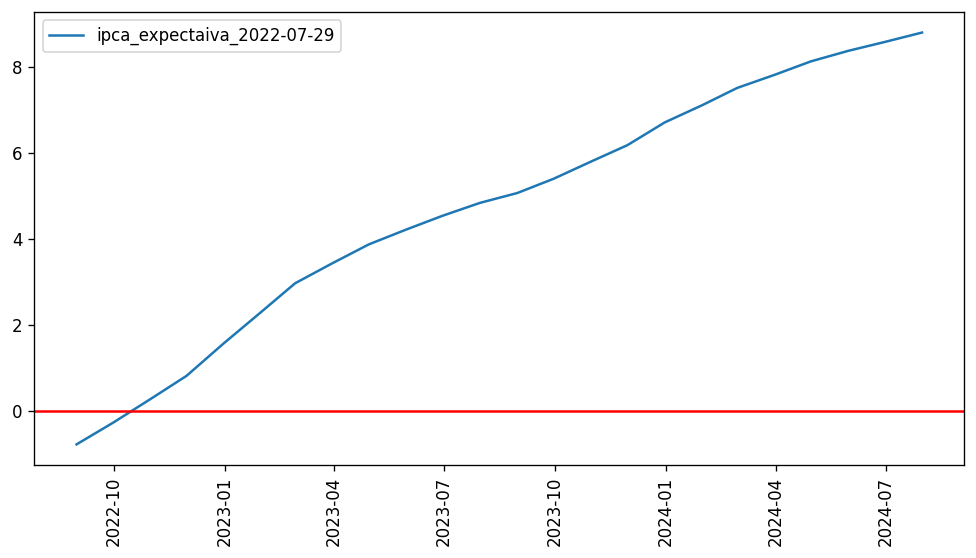

In [29]:

figure(figsize=(10, 5), dpi=120)
plt.plot(df_ipca_forcast.index, df_ipca_forcast['cumsum_mediana'], label=f'ipca_expectaiva_{data_previsao}')
plt.xticks(rotation=90)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.ayhline(x=0.0, color='r', linestyle='-')
plt.legend()
plt.show()
